# Tarea03 - Ajuste de curvas

## Datos Personales
Carlos Riolo Sotelo, Expediente: 735124

02/03/2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [2]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

## Polinomio de Grado 1

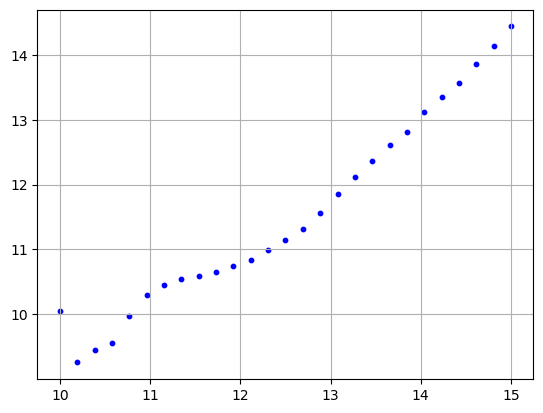

In [3]:
#Polinomio de Grado 1
%matplotlib inline

x=np.linspace(10,15,27)


plt.figure()
plt.scatter(x,data, color="blue", s=10)
plt.grid()

In [4]:
def func_elect(beta,X,y):
    m,n = X.shape 
    beta=np.reshape(beta, [n,1])
    prediccion=X@beta
    error=prediccion-y
    return (error.T @ error)[0][0]
    

In [5]:
# f(x)=b0 + b1*x 
m=len(data)
ones=np.ones([m,1])
x1=np.reshape(x,[m,1])


X=np.hstack((ones,x1))
X

array([[ 1.        , 10.        ],
       [ 1.        , 10.19230769],
       [ 1.        , 10.38461538],
       [ 1.        , 10.57692308],
       [ 1.        , 10.76923077],
       [ 1.        , 10.96153846],
       [ 1.        , 11.15384615],
       [ 1.        , 11.34615385],
       [ 1.        , 11.53846154],
       [ 1.        , 11.73076923],
       [ 1.        , 11.92307692],
       [ 1.        , 12.11538462],
       [ 1.        , 12.30769231],
       [ 1.        , 12.5       ],
       [ 1.        , 12.69230769],
       [ 1.        , 12.88461538],
       [ 1.        , 13.07692308],
       [ 1.        , 13.26923077],
       [ 1.        , 13.46153846],
       [ 1.        , 13.65384615],
       [ 1.        , 13.84615385],
       [ 1.        , 14.03846154],
       [ 1.        , 14.23076923],
       [ 1.        , 14.42307692],
       [ 1.        , 14.61538462],
       [ 1.        , 14.80769231],
       [ 1.        , 15.        ]])

In [6]:
beta_inicial=np.random.rand(2) #Son 2 porque son 2 betas
y_vec=np.reshape(data,[m,1])

In [7]:
sol=opt.minimize(func_elect, beta_inicial, args=(X,y_vec))
sol

      fun: 2.3704889518284693
 hess_inv: array([[ 1.30820104, -0.1031746 ],
       [-0.1031746 ,  0.00825397]])
      jac: array([ 0.00000000e+00, -1.49011612e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-0.5911882 ,  0.97068654])

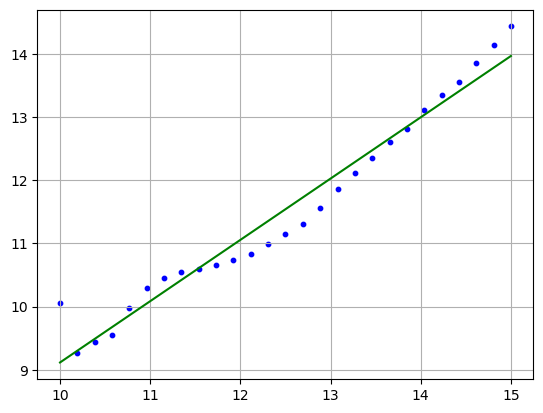

In [8]:
plt.figure()
plt.scatter(x,data, color="blue", s=10)
plt.plot(x,X@sol.x, "g")
plt.grid()

## Polinomio de Grado 2

In [9]:
# f(x)=b0 + b1*x + b2*x^2
m=len(data)
ones=np.ones([m,1])
x12=np.reshape(x,[m,1])
x22=np.reshape(x**2,[m,1])


X2=np.hstack((ones,x12,x22))
X2

array([[  1.        ,  10.        , 100.        ],
       [  1.        ,  10.19230769, 103.88313609],
       [  1.        ,  10.38461538, 107.84023669],
       [  1.        ,  10.57692308, 111.87130178],
       [  1.        ,  10.76923077, 115.97633136],
       [  1.        ,  10.96153846, 120.15532544],
       [  1.        ,  11.15384615, 124.40828402],
       [  1.        ,  11.34615385, 128.7352071 ],
       [  1.        ,  11.53846154, 133.13609467],
       [  1.        ,  11.73076923, 137.61094675],
       [  1.        ,  11.92307692, 142.15976331],
       [  1.        ,  12.11538462, 146.78254438],
       [  1.        ,  12.30769231, 151.47928994],
       [  1.        ,  12.5       , 156.25      ],
       [  1.        ,  12.69230769, 161.09467456],
       [  1.        ,  12.88461538, 166.01331361],
       [  1.        ,  13.07692308, 171.00591716],
       [  1.        ,  13.26923077, 176.07248521],
       [  1.        ,  13.46153846, 181.21301775],
       [  1.        ,  13.65384

In [10]:
beta_inicial2=np.random.rand(3) #Son 3 porq son 3 betas
y_vec2=np.reshape(data,[m,1])


In [11]:
sol2=opt.minimize(func_elect, beta_inicial2, args=(X2,y_vec2))
sol2

      fun: 0.8443847082472258
 hess_inv: array([[ 1.10829912e+02, -1.78819331e+01,  7.11150341e-01],
       [-1.78819331e+01,  2.89429593e+00, -1.15441679e-01],
       [ 7.11150341e-01, -1.15441679e-01,  4.61766715e-03]])
      jac: array([-7.4505806e-09,  7.4505806e-08, -2.5331974e-07])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([17.68572288, -1.99622098,  0.1186763 ])

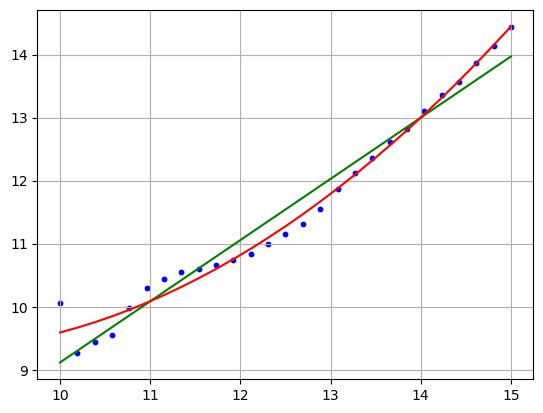

In [12]:
plt.figure()
plt.scatter(x,data, color="blue", s=10)
plt.plot(x,X@sol.x, "g")
plt.plot(x12,X2@sol2.x, "r")
plt.grid()

## Polinomio de Grado 3


In [13]:
# f(x)=b0 + b1*x + b2*x^2 + b3*x^3
m=len(data)
ones=np.ones([m,1])
x13=np.reshape(x,[m,1])
x23=np.reshape(x**2,[m,1])
x33=np.reshape(x**3,[m,1])


X3=np.hstack((ones,x13,x23,x33))
X3

array([[1.00000000e+00, 1.00000000e+01, 1.00000000e+02, 1.00000000e+03],
       [1.00000000e+00, 1.01923077e+01, 1.03883136e+02, 1.05880889e+03],
       [1.00000000e+00, 1.03846154e+01, 1.07840237e+02, 1.11987938e+03],
       [1.00000000e+00, 1.05769231e+01, 1.11871302e+02, 1.18325415e+03],
       [1.00000000e+00, 1.07692308e+01, 1.15976331e+02, 1.24897588e+03],
       [1.00000000e+00, 1.09615385e+01, 1.20155325e+02, 1.31708722e+03],
       [1.00000000e+00, 1.11538462e+01, 1.24408284e+02, 1.38763086e+03],
       [1.00000000e+00, 1.13461538e+01, 1.28735207e+02, 1.46064947e+03],
       [1.00000000e+00, 1.15384615e+01, 1.33136095e+02, 1.53618571e+03],
       [1.00000000e+00, 1.17307692e+01, 1.37610947e+02, 1.61428226e+03],
       [1.00000000e+00, 1.19230769e+01, 1.42159763e+02, 1.69498179e+03],
       [1.00000000e+00, 1.21153846e+01, 1.46782544e+02, 1.77832698e+03],
       [1.00000000e+00, 1.23076923e+01, 1.51479290e+02, 1.86436049e+03],
       [1.00000000e+00, 1.25000000e+01, 1.56250000e

In [14]:
beta_inicial3=np.random.rand(4) #Son 4 porq son 4 betas
y_vec3=np.reshape(data,[m,1])

In [15]:
sol3=opt.minimize(func_elect, beta_inicial3, args=(X3,y_vec3))
sol3

      fun: 0.8411582892469258
 hess_inv: array([[ 9.80399919e+03, -2.37928234e+03,  1.90787639e+02,
        -5.05656374e+00],
       [-2.37928234e+03,  5.77685982e+02, -4.63443342e+01,
         1.22884474e+00],
       [ 1.90787639e+02, -4.63443342e+01,  3.71968993e+00,
        -9.86763303e-02],
       [-5.05656374e+00,  1.22884474e+00, -9.86763303e-02,
         2.61897567e-03]])
      jac: array([ 0.0124859 ,  0.05371174, -0.02015009, -0.47562698])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 242
      nit: 12
     njev: 46
   status: 2
  success: False
        x: array([ 9.38420984e+00,  6.57244768e-02, -5.04089743e-02,  4.57789385e-03])

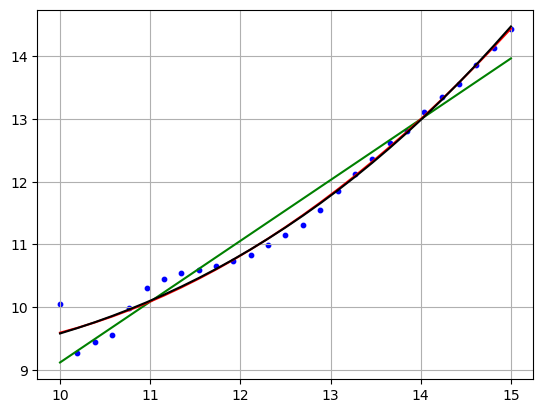

In [16]:
plt.figure()
plt.scatter(x,data, color="blue", s=10)
plt.plot(x,X@sol.x, "g")
plt.plot(x12,X2@sol2.x, "r")
plt.plot(x13,X3@sol3.x, color="black")
plt.grid()

# Interpretación de Resultados

Conforme se aumenta el grado del Polinomio, se ve una tendencia de ajustarse mejor al conjunto de datos y describe mejor la tendencia. La diferencia de polinomio de grado 1 a polinomio de grado 2 es considerable y notable, pero la diferenicia entre el polinomio 2 y 3 es mínima en este segmento de datos, por lo que usar cualquiera de los dos resultaría prácticamente en lo mismo.

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [17]:
dataPOB=pd.read_csv("population_data.csv")
dataPOB

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


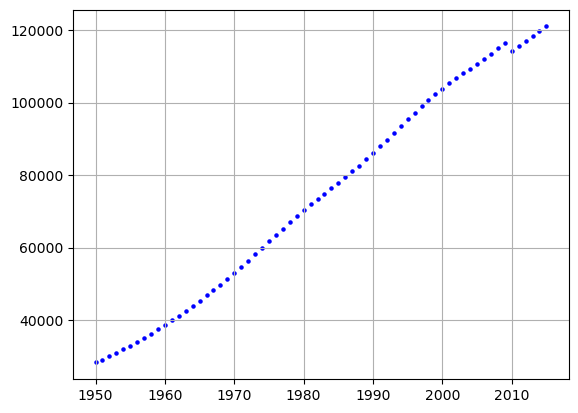

In [18]:
p=np.linspace(1950,2015,66)
p
#p=dataPOB["Year"]
q=dataPOB["Poblacion"]
q

plt.figure()
plt.scatter(p,q,color="blue", s=5)
plt.grid()

## Polinomio de Grado 1, con datos de Población

In [19]:
def func_pob(beta,X,y):
    m,n = X.shape # m es la cantidad de muestras
    beta=np.reshape(beta, [n,1])
    prediccion=X@beta
    error=prediccion-y
    return (error.T @ error)[0][0]

In [20]:
# f(x)=b0 + b1*x
m=len(q)
ones=np.ones([m,1])
p1=np.reshape(p,[m,1])

P=np.hstack((ones,p1))
P

array([[1.000e+00, 1.950e+03],
       [1.000e+00, 1.951e+03],
       [1.000e+00, 1.952e+03],
       [1.000e+00, 1.953e+03],
       [1.000e+00, 1.954e+03],
       [1.000e+00, 1.955e+03],
       [1.000e+00, 1.956e+03],
       [1.000e+00, 1.957e+03],
       [1.000e+00, 1.958e+03],
       [1.000e+00, 1.959e+03],
       [1.000e+00, 1.960e+03],
       [1.000e+00, 1.961e+03],
       [1.000e+00, 1.962e+03],
       [1.000e+00, 1.963e+03],
       [1.000e+00, 1.964e+03],
       [1.000e+00, 1.965e+03],
       [1.000e+00, 1.966e+03],
       [1.000e+00, 1.967e+03],
       [1.000e+00, 1.968e+03],
       [1.000e+00, 1.969e+03],
       [1.000e+00, 1.970e+03],
       [1.000e+00, 1.971e+03],
       [1.000e+00, 1.972e+03],
       [1.000e+00, 1.973e+03],
       [1.000e+00, 1.974e+03],
       [1.000e+00, 1.975e+03],
       [1.000e+00, 1.976e+03],
       [1.000e+00, 1.977e+03],
       [1.000e+00, 1.978e+03],
       [1.000e+00, 1.979e+03],
       [1.000e+00, 1.980e+03],
       [1.000e+00, 1.981e+03],
       [

In [21]:
beta_inicialp1=np.random.rand(2) 
q_vec=np.reshape((np.asarray(q)),[m,1])

In [22]:
solp1=opt.minimize(func_pob, beta_inicialp1, args=(P,q_vec))
solp1

      fun: 212137169.57964075
 hess_inv: array([[ 2.76191899e+02, -1.39303523e-01],
       [-1.39303523e-01,  7.02627262e-05]])
      jac: array([-2.000e+00, -2.452e+03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 158
      nit: 9
     njev: 49
   status: 2
  success: False
        x: array([-2.98661233e+06,  1.54397451e+03])

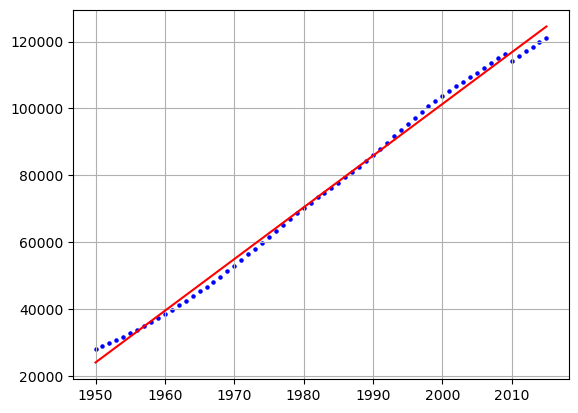

In [23]:
plt.figure()
plt.scatter(p,q,color="blue", s=5)
plt.plot(p,P@solp1.x,color="red")
plt.grid()

In [24]:
np.asarray(q)


array([ 28296,  29110,  29980,  30904,  31880,  32906,  33978,  35095,
        36253,  37448,  38677,  39939,  41234,  42564,  43931,  45339,
        46784,  48264,  49788,  51361,  52988,  54669,  56396,  58156,
        59931,  61708,  63486,  65261,  67013,  68715,  70353,  71916,
        73416,  74880,  76351,  77859,  79410,  80999,  82635,  84327,
        86077,  87890,  89758,  91654,  93542,  95393,  97202,  98969,
       100679, 102317, 103874, 105340, 106724, 108056, 109382, 110732,
       112117, 113530, 114968, 116423, 114255, 115683, 117054, 118395,
       119713, 121005], dtype=int64)

## Polinomio de Grado 2, con datos de Población

In [25]:
# f(x)=b0 + b1*x + b2*x^2 
m=len(q)
ones=np.ones([m,1])
p12=np.reshape(p,[m,1])
p22=np.reshape(p**2,[m,1])

P2=np.hstack((ones,p12,p22))
P2

array([[1.000000e+00, 1.950000e+03, 3.802500e+06],
       [1.000000e+00, 1.951000e+03, 3.806401e+06],
       [1.000000e+00, 1.952000e+03, 3.810304e+06],
       [1.000000e+00, 1.953000e+03, 3.814209e+06],
       [1.000000e+00, 1.954000e+03, 3.818116e+06],
       [1.000000e+00, 1.955000e+03, 3.822025e+06],
       [1.000000e+00, 1.956000e+03, 3.825936e+06],
       [1.000000e+00, 1.957000e+03, 3.829849e+06],
       [1.000000e+00, 1.958000e+03, 3.833764e+06],
       [1.000000e+00, 1.959000e+03, 3.837681e+06],
       [1.000000e+00, 1.960000e+03, 3.841600e+06],
       [1.000000e+00, 1.961000e+03, 3.845521e+06],
       [1.000000e+00, 1.962000e+03, 3.849444e+06],
       [1.000000e+00, 1.963000e+03, 3.853369e+06],
       [1.000000e+00, 1.964000e+03, 3.857296e+06],
       [1.000000e+00, 1.965000e+03, 3.861225e+06],
       [1.000000e+00, 1.966000e+03, 3.865156e+06],
       [1.000000e+00, 1.967000e+03, 3.869089e+06],
       [1.000000e+00, 1.968000e+03, 3.873024e+06],
       [1.000000e+00, 1.969000e

In [26]:
beta_inicialp2=np.random.rand(3) 
q_vec2=np.reshape((np.asarray(q)),[m,1])

In [27]:
solp2=opt.minimize(func_pob, beta_inicialp2, args=(P2,q_vec2))
solp2

      fun: 211726282.82659644
 hess_inv: array([[ 7.16422828e-01,  2.55527029e-03, -1.46848812e-06],
       [ 2.55527029e-03,  9.23676810e-06, -5.30006243e-09],
       [-1.46848812e-06, -5.30006243e-09,  3.04197531e-12]])
      jac: array([-2.0000000e+01, -4.7472000e+04, -9.2097488e+07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 328
      nit: 16
     njev: 79
   status: 2
  success: False
        x: array([-3.63756630e+04, -1.43239058e+03,  7.50611887e-01])

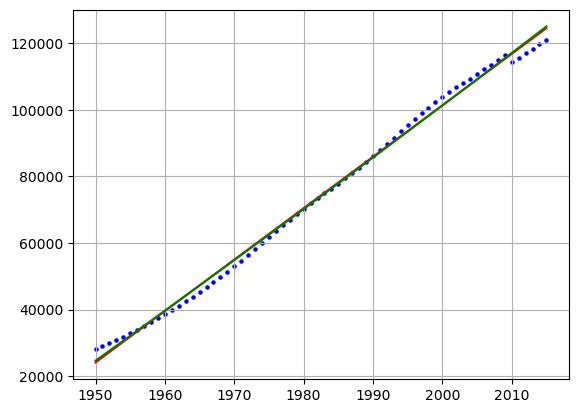

In [28]:
plt.figure()
plt.scatter(p,q,color="blue", s=5)
plt.plot(p,P@solp1.x,color="red")
plt.plot(p12,P2@solp2.x,color="green")
plt.grid()

## Polinomios de Grado 3, con datos de Población

In [29]:
# f(x)=b0 + b1*x + b2*x^2 + b3*x^3
m=len(q)
ones=np.ones([m,1])
p13=np.reshape(p,[m,1])
p23=np.reshape(p**2,[m,1])
p33=np.reshape(p**3,[m,1])

P3=np.hstack((ones,p13,p23,p33))
P3

array([[1.00000000e+00, 1.95000000e+03, 3.80250000e+06, 7.41487500e+09],
       [1.00000000e+00, 1.95100000e+03, 3.80640100e+06, 7.42628835e+09],
       [1.00000000e+00, 1.95200000e+03, 3.81030400e+06, 7.43771341e+09],
       [1.00000000e+00, 1.95300000e+03, 3.81420900e+06, 7.44915018e+09],
       [1.00000000e+00, 1.95400000e+03, 3.81811600e+06, 7.46059866e+09],
       [1.00000000e+00, 1.95500000e+03, 3.82202500e+06, 7.47205888e+09],
       [1.00000000e+00, 1.95600000e+03, 3.82593600e+06, 7.48353082e+09],
       [1.00000000e+00, 1.95700000e+03, 3.82984900e+06, 7.49501449e+09],
       [1.00000000e+00, 1.95800000e+03, 3.83376400e+06, 7.50650991e+09],
       [1.00000000e+00, 1.95900000e+03, 3.83768100e+06, 7.51801708e+09],
       [1.00000000e+00, 1.96000000e+03, 3.84160000e+06, 7.52953600e+09],
       [1.00000000e+00, 1.96100000e+03, 3.84552100e+06, 7.54106668e+09],
       [1.00000000e+00, 1.96200000e+03, 3.84944400e+06, 7.55260913e+09],
       [1.00000000e+00, 1.96300000e+03, 3.85336900e

In [30]:
beta_inicialp3=np.random.rand(4) 
q_vec3=np.reshape((np.asarray(q)),[m,1])

In [31]:
solp3=opt.minimize(func_pob, beta_inicialp3, args=(P3,q_vec3))
solp3

      fun: 3219165744.9249444
 hess_inv: array([[ 1.00000000e+00, -7.64971580e-10, -7.69170206e-07,
         3.87801269e-10],
       [-7.64971580e-10,  9.99998990e-01, -1.00881257e-03,
         2.54644887e-07],
       [-7.69170206e-07, -1.00881257e-03,  1.01770974e-06,
        -2.56892201e-10],
       [ 3.87801269e-10,  2.54644887e-07, -2.56892201e-10,
         6.48455862e-14]])
      jac: array([2.37440000e+04, 3.00689600e+07, 2.60232489e+10, 4.47612567e+13])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 200
      nit: 2
     njev: 38
   status: 2
  success: False
        x: array([ 5.29621322e-01,  1.73451451e-01, -5.43761471e-01,  2.83744109e-04])

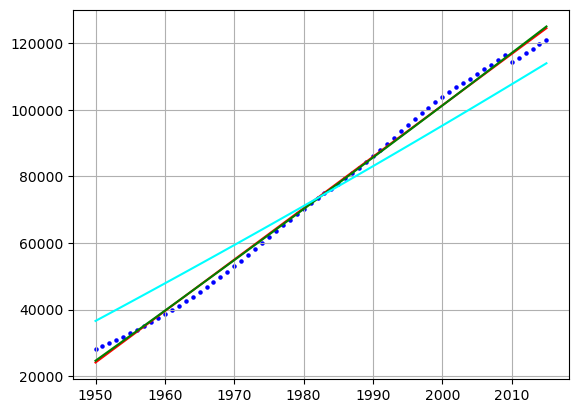

In [32]:
plt.figure()
plt.scatter(p,q,color="blue", s=5)
plt.plot(p,P@solp1.x,color="red")
plt.plot(p12,P2@solp2.x,color="green")
plt.plot(p13,P3@solp3.x, color="cyan")
plt.grid()

---

## Polinomio de Grado 1, con datos de Nacimiento

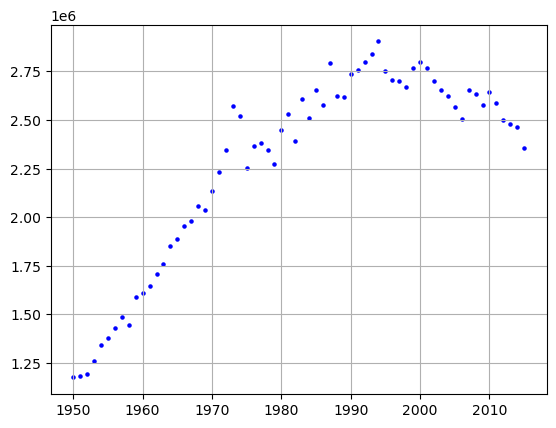

In [33]:
c=np.linspace(1950,2015,66)
c
#p=dataPOB["Year"]
b=dataPOB["Nacimientos"]
b

plt.figure()
plt.scatter(p,b,color="blue", s=5)
plt.grid()

In [34]:
def func_nac(beta,X,y):
    m,n = X.shape # m es la cantidad de muestras
    beta=np.reshape(beta, [n,1])
    prediccion=X@beta
    error=prediccion-y
    return (error.T @ error)[0][0]

In [35]:
# f(x)=b0 + b1*x
m=len(b)
ones=np.ones([m,1])
c1=np.reshape(c,[m,1])

C1=np.hstack((ones,c1))
C1

array([[1.000e+00, 1.950e+03],
       [1.000e+00, 1.951e+03],
       [1.000e+00, 1.952e+03],
       [1.000e+00, 1.953e+03],
       [1.000e+00, 1.954e+03],
       [1.000e+00, 1.955e+03],
       [1.000e+00, 1.956e+03],
       [1.000e+00, 1.957e+03],
       [1.000e+00, 1.958e+03],
       [1.000e+00, 1.959e+03],
       [1.000e+00, 1.960e+03],
       [1.000e+00, 1.961e+03],
       [1.000e+00, 1.962e+03],
       [1.000e+00, 1.963e+03],
       [1.000e+00, 1.964e+03],
       [1.000e+00, 1.965e+03],
       [1.000e+00, 1.966e+03],
       [1.000e+00, 1.967e+03],
       [1.000e+00, 1.968e+03],
       [1.000e+00, 1.969e+03],
       [1.000e+00, 1.970e+03],
       [1.000e+00, 1.971e+03],
       [1.000e+00, 1.972e+03],
       [1.000e+00, 1.973e+03],
       [1.000e+00, 1.974e+03],
       [1.000e+00, 1.975e+03],
       [1.000e+00, 1.976e+03],
       [1.000e+00, 1.977e+03],
       [1.000e+00, 1.978e+03],
       [1.000e+00, 1.979e+03],
       [1.000e+00, 1.980e+03],
       [1.000e+00, 1.981e+03],
       [

In [36]:
beta_inicialc1=np.random.rand(2) 
b_vec1=np.reshape((np.asarray(b)),[m,1])

In [37]:
solc1=opt.minimize(func_nac, beta_inicialc1, args=(C1,b_vec1))
solc1

      fun: 4751383098760.73
 hess_inv: array([[ 3.53053594e-09, -3.52939907e-09],
       [-3.52939907e-09,  3.52939851e-09]])
      jac: array([-9.17504000e+05, -1.81220147e+09])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 207
      nit: 21
     njev: 69
   status: 2
  success: False
        x: array([-3.99904438e+07,  2.13169552e+04])

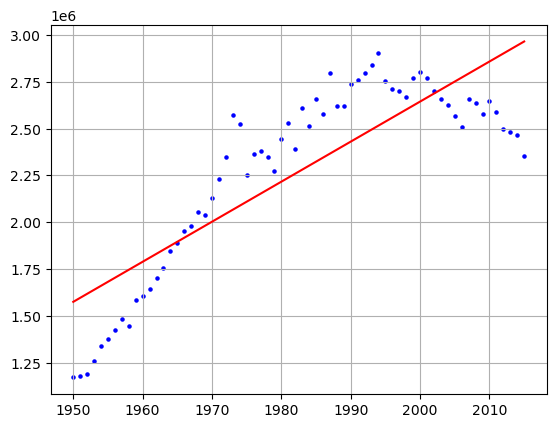

In [38]:
plt.figure()
plt.scatter(c,b,color="blue", s=5)
plt.plot(c,C1@solc1.x,color="red")
plt.grid()

## Polinomios de Grado 2, con datos de Nacimiento

In [39]:
# f(x)=b0 + b1*x + b2*x^2
m=len(b)
ones=np.ones([m,1])
c12=np.reshape(c,[m,1])
c22=np.reshape(c**2,[m,1])

C2=np.hstack((ones,c12,c22))
C2

array([[1.000000e+00, 1.950000e+03, 3.802500e+06],
       [1.000000e+00, 1.951000e+03, 3.806401e+06],
       [1.000000e+00, 1.952000e+03, 3.810304e+06],
       [1.000000e+00, 1.953000e+03, 3.814209e+06],
       [1.000000e+00, 1.954000e+03, 3.818116e+06],
       [1.000000e+00, 1.955000e+03, 3.822025e+06],
       [1.000000e+00, 1.956000e+03, 3.825936e+06],
       [1.000000e+00, 1.957000e+03, 3.829849e+06],
       [1.000000e+00, 1.958000e+03, 3.833764e+06],
       [1.000000e+00, 1.959000e+03, 3.837681e+06],
       [1.000000e+00, 1.960000e+03, 3.841600e+06],
       [1.000000e+00, 1.961000e+03, 3.845521e+06],
       [1.000000e+00, 1.962000e+03, 3.849444e+06],
       [1.000000e+00, 1.963000e+03, 3.853369e+06],
       [1.000000e+00, 1.964000e+03, 3.857296e+06],
       [1.000000e+00, 1.965000e+03, 3.861225e+06],
       [1.000000e+00, 1.966000e+03, 3.865156e+06],
       [1.000000e+00, 1.967000e+03, 3.869089e+06],
       [1.000000e+00, 1.968000e+03, 3.873024e+06],
       [1.000000e+00, 1.969000e

In [40]:
beta_inicialc2=np.random.rand(3) 
b_vec2=np.reshape((np.asarray(b)),[m,1])

In [41]:
solc2=opt.minimize(func_nac, beta_inicialc2, args=(C2,b_vec2))
solc2

      fun: 4852325824507.42
 hess_inv: array([[ 5.73299294e-01, -4.54557553e-04,  8.27544374e-08],
       [-4.54557553e-04,  2.13588789e-05, -1.06572135e-08],
       [ 8.27544374e-08, -1.06572135e-08,  5.35487811e-12]])
      jac: array([0.00000000e+00, 1.42868480e+07, 2.82919567e+10])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 208
      nit: 5
     njev: 49
   status: 2
  success: False
        x: array([-5.88496414e+04, -1.95084743e+04,  1.04337704e+01])

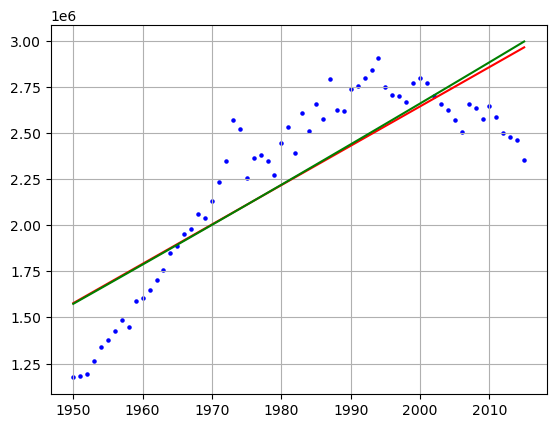

In [42]:
plt.figure()
plt.scatter(c,b,color="blue", s=5)
plt.plot(c,C1@solc1.x,color="red")
plt.plot(c,C2@solc2.x,color="green")
plt.grid()

## Polinomios de Grado 3, con datos de Nacimiento

In [43]:
# f(x)=b0 + b1*x + b2*x^2 + b3*x^3
m=len(b)
ones=np.ones([m,1])
c13=np.reshape(c,[m,1])
c23=np.reshape(c**2,[m,1])
c33=np.reshape(c**3,[m,1])

C3=np.hstack((ones,c13,c23,c33))
C3

array([[1.00000000e+00, 1.95000000e+03, 3.80250000e+06, 7.41487500e+09],
       [1.00000000e+00, 1.95100000e+03, 3.80640100e+06, 7.42628835e+09],
       [1.00000000e+00, 1.95200000e+03, 3.81030400e+06, 7.43771341e+09],
       [1.00000000e+00, 1.95300000e+03, 3.81420900e+06, 7.44915018e+09],
       [1.00000000e+00, 1.95400000e+03, 3.81811600e+06, 7.46059866e+09],
       [1.00000000e+00, 1.95500000e+03, 3.82202500e+06, 7.47205888e+09],
       [1.00000000e+00, 1.95600000e+03, 3.82593600e+06, 7.48353082e+09],
       [1.00000000e+00, 1.95700000e+03, 3.82984900e+06, 7.49501449e+09],
       [1.00000000e+00, 1.95800000e+03, 3.83376400e+06, 7.50650991e+09],
       [1.00000000e+00, 1.95900000e+03, 3.83768100e+06, 7.51801708e+09],
       [1.00000000e+00, 1.96000000e+03, 3.84160000e+06, 7.52953600e+09],
       [1.00000000e+00, 1.96100000e+03, 3.84552100e+06, 7.54106668e+09],
       [1.00000000e+00, 1.96200000e+03, 3.84944400e+06, 7.55260913e+09],
       [1.00000000e+00, 1.96300000e+03, 3.85336900e

In [44]:
beta_inicialc3=np.random.rand(4) 
b_vec3=np.reshape((np.asarray(b)),[m,1])

In [45]:
solc3=opt.minimize(func_nac, beta_inicialc3, args=(C3,b_vec3))
solc3

      fun: 4369463882474.7886
 hess_inv: array([[ 1.31707521e-01, -4.97434924e-02,  5.00832208e-05,
        -1.26151317e-08],
       [-4.97486683e-02,  2.45530283e-02, -2.47319721e-05,
         6.23162199e-09],
       [ 5.00884391e-05, -2.47319743e-05,  2.49175590e-08,
        -6.27972846e-12],
       [-1.26164479e-08,  6.23162289e-09, -6.27972880e-12,
         1.58295755e-15]])
      jac: array([0.00000000e+00, 1.80439613e+10, 3.58752237e+13, 7.13689084e+16])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 247
      nit: 4
     njev: 47
   status: 2
  success: False
        x: array([ 7.77686417e+04, -1.74022195e+05,  1.65851241e+02, -3.90864003e-02])

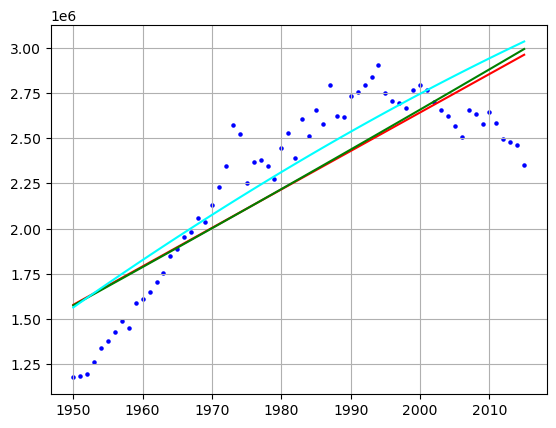

In [46]:
plt.figure()
plt.scatter(c,b,color="blue", s=5)
plt.plot(c,C1@solc1.x,color="red")
plt.plot(c,C2@solc2.x,color="green")
plt.plot(c,C3@solc3.x,color="cyan")
plt.grid()

---

# Interpretación de Resultados



En el Ejercio 2, en la parte donde se trabaja con los datos de Población, se observa claramente que conforme se aumenta el grado del polinomio la función se ajusta mejor al conjunto de puntos de las muestras, pero el polinomio de grado 3 tiende a variar más de los otros dos polinomios, por lo que considero que el mejor polinomio para describir el comportamiento en este rango de tiempo sea un Polinomio de Grado 2.

Para la parte donde se trabaja con los datos de Nacimiento, los polinomios de grado 1 y 2 se desvian muy poco entre sí, y el polinomio de grado 3 se desvía un poco más pero se acerca un poco más a los puntos del centro de la muestra, no veo información suficiente para determinar cual sería el mejor para describir el periodo de tiempo.